**How model works.....**

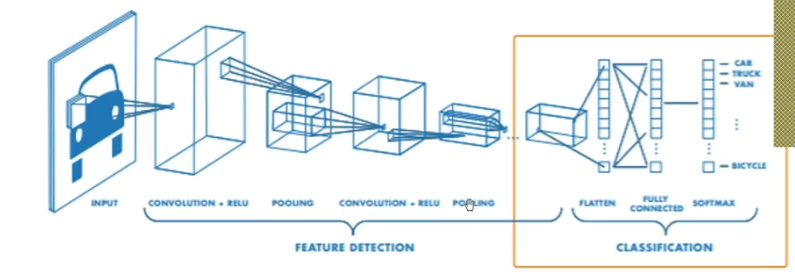

In [ ]:
from IPython.display import Image
Image("/content/model.png")

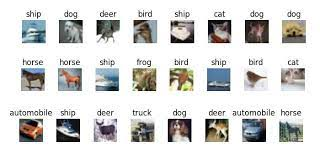

In [ ]:
Image("/content/cifar10sample.jpeg")

In [ ]:
#import necessery
import torch
import torch.nn as nn
# PROCESS OF IMPROVING THE ACCURACY OF THE MACHINE LEARNING MODEL
import torch.optim as optim
import torchvision
# transforming the data into a more suitable form for the model
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [ ]:
# COMPOSE -create a pipeline of multiple transformations.
# It takes a list of transformation functions as input and returns a single transformation that applies those functions sequentially.
# TOTENSOR- It converts the image from PIL (Python Imaging Library) format or NumPy array format to a tensor format that PyTorch can work with
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=6,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=6,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 13112347.84it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Displaying some images**

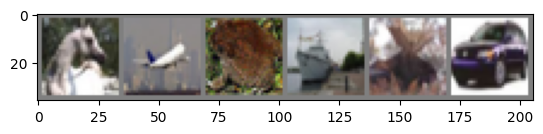

In [ ]:
#get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

#denormalize and show
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

imshow(torchvision.utils.make_grid(images))

**DEFINE CNN**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
# get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

# zero the parameter gradients
        optimizer.zero_grad()

# forward & backward & optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.186
[1,  4000] loss: 1.813
[1,  6000] loss: 1.629
[1,  8000] loss: 1.538
[2,  2000] loss: 1.438
[2,  4000] loss: 1.399
[2,  6000] loss: 1.366
[2,  8000] loss: 1.337
[3,  2000] loss: 1.247
[3,  4000] loss: 1.253
[3,  6000] loss: 1.225
[3,  8000] loss: 1.214
[4,  2000] loss: 1.130
[4,  4000] loss: 1.141
[4,  6000] loss: 1.140
[4,  8000] loss: 1.116
[5,  2000] loss: 1.062
[5,  4000] loss: 1.051
[5,  6000] loss: 1.059
[5,  8000] loss: 1.061
[6,  2000] loss: 0.968
[6,  4000] loss: 1.008
[6,  6000] loss: 0.987
[6,  8000] loss: 1.000
[7,  2000] loss: 0.928
[7,  4000] loss: 0.945
[7,  6000] loss: 0.932
[7,  8000] loss: 0.959
[8,  2000] loss: 0.875
[8,  4000] loss: 0.885
[8,  6000] loss: 0.905
[8,  8000] loss: 0.910
[9,  2000] loss: 0.823
[9,  4000] loss: 0.864
[9,  6000] loss: 0.846
[9,  8000] loss: 0.878
[10,  2000] loss: 0.783
[10,  4000] loss: 0.807
[10,  6000] loss: 0.835
[10,  8000] loss: 0.836
Finished Training


In [ ]:
# path to save the model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

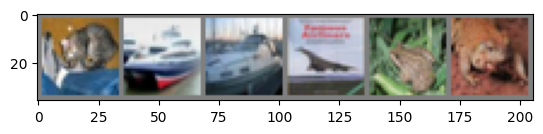

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 85 %
Accuracy of  bird : 54 %
Accuracy of   cat : 43 %
Accuracy of  deer : 53 %
Accuracy of   dog : 48 %
Accuracy of  frog : 71 %
Accuracy of horse : 64 %
Accuracy of  ship : 79 %
Accuracy of truck : 65 %


In [ ]:
!pip install pillow
image_path = 'https://freepngimg.com/thumb/car/3-2-car-free-download-png.png'


Predicted class:  car


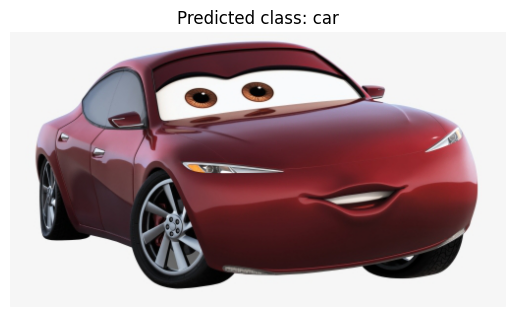

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Provide path via local image
image_path = '/content/unknown.png'

#load, preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to match CIFAR-10 dimensions
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
input_image = preprocess(Image.open(image_path)).unsqueeze(0)  #  function is used to add an extra dimension to the tensor

# Load model
model = Net()
model.load_state_dict(torch.load('cifar_net.pth'))
model.eval() #switch the model to evaluation mode

# Perform inference
with torch.no_grad():
    output = model(input_image)
    probabilities = F.softmax(output, dim=1) # softmax calculates the probabilities of each class prediction
    _, predicted = torch.max(probabilities, 1)  # used to compute the maximum value along a given dimension of a tensor.
    predicted_class = classes[predicted.item()]

# Display the prediction
print("Predicted class: ", predicted_class)

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Predicted class: " + predicted_class)
plt.show()
#image source:https://www.pngitem.com/middle/iTmiiho_natalie-certain-mcqueen-lightning-cars-cartoon-pixar-cars/